# Airbnb House Analysis and Recommender Application

##### Jie Bao, Kuangyi Zhang, Lanny Xu
##### Dr. Bamshad Mobasher, Spring 2018

## PART 2   User-based Recommender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

### 1. Data Preprocessing

In [2]:
housing_reviews = pd.read_table("reviews.csv", header='infer', delimiter=",", na_values='NaN')

In [3]:
housing_reviews.shape

(132353, 7)

In [4]:
housing_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,rating,comments
0,1301530,13937403,6/8/14,55,Deborah,93,Great location downtown near everything! Host ...
1,192652,708419,11/10/11,99,Laura,97,"Stephanie was awesome! Highly recommended, gre..."
2,14081954,146698448,4/23/17,464,Jamison,100,The place was so cool. The whole family loved ...
3,9452418,75922280,5/23/16,706,Eamon,100,Anne is a very thoughtful host who left all th...
4,3385966,108126286,10/14/16,1143,Katie,97,"Chad's place is awesome! It's a quiet, clean, ..."


In [5]:
housing_reviews.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,132353,NaN,NaN,NaN,7.32167e+06,5.08661e+06,2384,2.73061e+06,6.88433e+06,1.19731e+07,1.85981e+07
id,132353,NaN,NaN,NaN,8.26275e+07,4.17666e+07,849,4.85532e+07,8.64855e+07,1.14583e+08,1.51007e+08
date,132353,2267,3/19/17,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewer_id,132353,NaN,NaN,NaN,3.96426e+07,3.28041e+07,55,1.19079e+07,3.12252e+07,6.14423e+07,1.29263e+08
reviewer_name,132353,22527,Michael,1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,132353,NaN,NaN,NaN,94.834,4.5955,0,93,96,98,100
comments,132207,130168,The host canceled this reservation the day bef...,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop missing values

In [6]:
drop_rating_index = housing_reviews.index[housing_reviews['rating'] == 0]
drop_rating_index.tolist()
len(drop_rating_index)

43

In [7]:
housing_reviews = housing_reviews.drop(housing_reviews.index[drop_rating_index])
housing_reviews.shape

(132310, 7)

In [8]:
housing_reviews = housing_reviews[~housing_reviews['comments'].isnull()] 
housing_reviews = housing_reviews[~housing_reviews['rating'].isnull()] 
housing_reviews.shape

(132164, 7)

In [9]:
recommend = housing_reviews[['listing_id', 'reviewer_id', 'rating']]
recommend.T

,0,1,2,3,4,5,6,7,8,9,...,132343,132344,132345,132346,132347,132348,132349,132350,132351,132352
listing_id,1301530,192652,14081954,9452418,3385966,12153109,12891430,6150893,1127661,4667333,...,18490659,7386488,16365205,18134292,9589373,17906320,18359380,14339201,13014320,15484924
reviewer_id,55,99,464,706,1143,1169,1744,1956,2038,3240,...,128612521,128624236,128753130,128928290,129011580,129024548,129073818,129177179,129181647,129263162
rating,93,97,100,100,97,92,91,98,98,90,...,100,97,94,100,97,100,100,99,97,94


#### Extract users with more than 3 ratings

In [10]:
upper_2 = recommend['reviewer_id'].value_counts() > 3
users = upper_2[upper_2].index.tolist()
print len(users)

582


In [11]:
recommend = recommend[recommend['reviewer_id'].isin(users)]
recommend.shape

(2999, 3)

In [12]:
recommendG = recommend.groupby('reviewer_id')['reviewer_id'].count()
recommendG.head(10)

reviewer_id
50034     6
76903     4
104815    6
140995    5
183420    5
196524    5
210853    7
218987    4
228969    9
266837    4
Name: reviewer_id, dtype: int64

#### Extract arrays of list_id and review_id

In [13]:
recommend.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
listing_id,2999.0,7.436787e+06,5.354434e+06,2384.0,2503128.0,6700654.0,12590517.0,18139782.0
reviewer_id,2999.0,3.045511e+07,3.017312e+07,50034.0,6511426.0,21404852.0,44387734.0,122903399.0
rating,2999.0,9.532177e+01,4.084109e+00,58.0,94.0,96.0,98.0,100.0


In [14]:
np.unique(recommend["listing_id"]).shape

(1311L,)

In [15]:
np.unique(recommend["reviewer_id"]).shape

(582L,)

In [16]:
recommend.shape

(2999, 3)

In [17]:
list_id=recommend.iloc[0:,0].unique()
review_id = recommend.iloc[0:,1].unique()

In [18]:
print len(list_id), len(review_id)

1311 582


#### Compose user-listing rating matrix

In [19]:
dict = {}
for user in review_id:
    dict[user] = {}
number = 0
for i in range(len(recommend)):
    dict[recommend.iloc[i].reviewer_id][recommend.iloc[i].listing_id] = recommend.iloc[i].rating

In [20]:
dict[50034]

{3984383: 99, 8824905: 95, 13857415: 94, 13858506: 98, 16146505: 99}

In [21]:
recommend[recommend['reviewer_id'] == 50034]

,listing_id,reviewer_id,rating
307,3984383,50034,99
308,3984383,50034,99
309,8824905,50034,95
310,13857415,50034,94
311,13858506,50034,98
312,16146505,50034,99


In [22]:
recommend_list = []
for user in review_id:
    user_review = []
    for list in list_id:
        if list in dict[user].keys():
            user_review.append(dict[user][list])
        else:
            user_review.append(0)
    recommend_list.append(user_review)

In [23]:
dataMat =np.array(recommend_list)
print dataMat
print dataMat.shape

[[ 99  95  94 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ..., 100  98  95]]
(582L, 1311L)


### 2. MAE Analysis to find the best similarity measure

In [43]:
from numpy import *
from numpy import linalg as la
import numpy as np

#### Analysis K for svd transformed items

In [25]:
U,Sigma,VT = la.svd(mat(dataMat))
SigK=Sigma**2
K = 400
print "Coverage of K = %d: %.4f" %(K, sum(SigK[: K])/sum(SigK))

Coverage of K = 400: 0.9148


#### Functions to compute the MAE with different similarity measures

In [32]:
# three distance meansurement
def ecludSim(inA,inB):
    return 1.0 / (1.0 +np.linalg.norm(inA - inB))
def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]
def cosSim(vecA,vecB):#only take array!!
    vecA = np.array(vecA).T
    vecB = np.array(vecA).T
    vecA_norm=np.linalg.norm(vecA) 
    vecB_norm=np.linalg.norm(vecB)
    sims=np.dot(vecA,vecB)/(vecA_norm*vecB_norm)
    return sims 

In [33]:
# two ways to compute column-based similarity matrix
def standEst(dataMat,simMeas, K=4):
    n = shape(dataMat)[1]
    similarities = np.zeros((n,n))
    if n>1:
        for i in range(n):
            similarities[i,i] = 1
            for j in range(i+1, n):
                overLap = nonzero(logical_and(dataMat[:,i]>0, \
                                      dataMat[:,j]>0))[0]
                if len(overLap) == 0: similarities[i,j] = 0
                else: similarities[i,j] = simMeas(dataMat[overLap,i], \
                                   dataMat[overLap,j])
                similarities[j,i] = similarities[i,j]
    return similarities

def svdEst(dataMat,simMeas, K=4):
    n = shape(dataMat)[1]
    similarities = np.ones((n,n))
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    SigK = mat(eye(K)*Sigma[:K]) #arrange Sigk into a diagonal matrix
    xformedItems = data.T * U[:,:K] * SigK.I  #create transformed items
    if n>1:
        for i in range(n):
            for j in range(i+1, n):
                similarities[i,j] = simMeas(xformedItems[i,:].T,\
                             xformedItems[j,:].T)
                similarities[j,i] = similarities[i,j]
    return similarities   
    
# colunm-based collabrative filtering
def estRating(dataMat, simMtr, user, item):
    n = shape(simMtr)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMtr[item, j]
        if similarity>=0: 
            simTotal += similarity
            ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [34]:
# This function performs evaluatoin on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld and the rest are used to estimate the withheld ratings
def cross_validate_user(dataMat, user, test_ratio, simMtr):
    
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])#non-zero rating 
    
    test_size = int(test_ratio * len(rated_items_by_user))
    np.random.seed(seed=20)
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)#Add indices for each test item
    withheld_items = rated_items_by_user[test_indices]#Items used for test
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)
    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estRating(dataMat, simMtr, user, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
        #print error_u
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [37]:
# Iterate over all users and for each perform evaluation by calling
# the above cross_validate_user function on each user.  Return ratio of total error 
# across all test cases to the total number of test cases, for all users

def test(dataMat, test_ratio, estMethod, simMeas, K):    
    simMtr = estMethod(dataMat,simMeas,K)
    
    total_error = 0
    total_count = 0
    c=0
    for i in range(dataMat.shape[0]):
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, simMtr)
        #print error_u, count_u
        total_error += error_u
        total_count += count_u
    #print total_error, total_count 
    MAE = total_error/total_count
    print 'Mean Absoloute Error for ',estMethod,' : ', MAE
    return MAE

#### Parameter analysis

In [40]:
print "Using Eucldean similarity measure:"
mae1 = test(dataMat, 0.2, standEst, ecludSim, K)
mae1 = test(dataMat, 0.2, svdEst, ecludSim, K)

print "\nUsing Cosine similarity measure:"
mae2 = test(dataMat, 0.2, standEst, cosSim, K)
mae2 = test(dataMat, 0.2, svdEst, cosSim, K)

print "\nUsing Pearson Correlation similarity measure:"
mae3 = test(dataMat, 0.2, standEst, pearsSim, K)
mae3 = test(dataMat, 0.2, svdEst, pearsSim, K)

Using Eucldean similarity measure:
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  2.42777192792
Mean Absoloute Error for  <function svdEst at 0x0000000014B43E48>  :  3.62313795478

Using Cosine similarity measure:
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.57591555141
Mean Absoloute Error for  <function svdEst at 0x0000000014B43E48>  :  3.57591555141

Using Pearson Correlation similarity measure:


D:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.57166718539
Mean Absoloute Error for  <function svdEst at 0x0000000014B43E48>  :  3.62361303805


In [45]:
# Compare different similarity measure
def compare_sims(data, K):
    x=[]
    score1 =[]
    score2 =[]
    score3 =[]
    for i in range(10,50,5):
        crosssize = i * 0.01
        score1.append(test(data,crosssize,standEst,ecludSim, K))
        score2.append(test(data,crosssize,standEst,cosSim, K))
        score3.append(test(data,crosssize,standEst,pearsSim, K))
        x.append(crosssize)
    return x, score1, score2, score3

In [46]:
x, score1, score2, score3 = compare_sims(dataMat, K)

Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  4.64856013731
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  6.27111111111
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  6.27111111111
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  2.38396107116
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.5535260771
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.53400226757
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  2.42777192792
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.57591555141
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.57166718539
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  2.36766634006
Mean Absoloute Error for  <function standEst at 0x0000000014B43C18>  :  3.3952700008
Mean Absoloute Error for  <function standEst at 0x000000

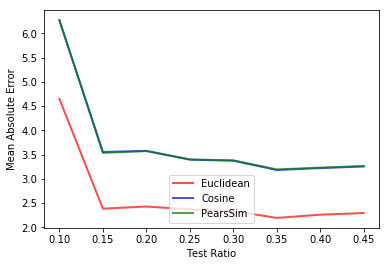

In [48]:
%matplotlib inline
plt.plot(x, score1, label='Euclidean',alpha=0.7, lw=2, c='r')  
plt.plot(x, score2, label='Cosine',alpha=0.7, lw=2, c='b')
plt.plot(x, score3, label='PearsSim',alpha=0.7, lw=2, c='g')
plt.legend(loc=8)
plt.xlabel('Test Ratio')
plt.ylabel("Mean Absolute Error")

It can be seen that 3 similarity measures display similar MAE. We choose Pearson Correlation similarity measure for recommender system.

### 3. User-based Collaborative Filtering

#### Define function to compute similaries among users

In [49]:
import operator
def most_similar_users(dataMat, queryUser, K, metric=ecludSim):
    user  = dataMat[queryUser]
    sim = {}
    index = 0
    for i in dataMat:
        similarity = metric(i, user)
        if(similarity == 1):
            index = index + 1
            continue
        sim[index] = similarity
        index = index + 1
    sorted_keys = sorted(sim.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_keys

#### Function to compute rating based on similar users

In [50]:
def predict(dataMat, review_id, list_index, similar_users, K):
    if len(similar_users) == 0:
        return 0.0
    numerator = 0.0
    denominator = 0.0
    index = 0
    for key, values in similar_users:
        if(index == K):
            break
        if dataMat[key][list_index] != 0:
            neighbor_id = review_id[key]        
            neighbor_similarity = values
            rating = dataMat[key][list_index]
            numerator += neighbor_similarity * rating
            denominator += neighbor_similarity
            index += 1
    result = numerator/denominator
    return result 

#### Function to recommend top K listings(items)

In [51]:
def recommend_list(dataMat, user_id, list_id, queryUser, K):
    nopreference_list = np.where(dataMat[queryUser,:]==0)[0]
    predict_rating = {}
    sorted_most_similar_users = most_similar_users(dataMat, queryUser, K, metric=pearsSim)
    for item in nopreference_list:
        result = predict(dataMat, user_id, item, sorted_most_similar_users, K)
        predict_rating[item] = result
    sorted_list = sorted(predict_rating.items(), key=operator.itemgetter(1), reverse=True)
    print 'Selected User ID:', user_id[queryUser], '\n'
    print 'Listing IDs we recommend to this user:','\n'
    index = 0
    for key, values in sorted_list:
        if(index == K):
            break
        print list_id[key]
        print '----------'
        index += 1

#### Illustration

In [57]:
# test case
queryUser = 4
K = 3
queryListing = 5
print dataMat[:4]

 [[99 95 94 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]


In [58]:
print 'Selected User ID:',review_id[queryUser], '\n'
print 'Top', K, 'most similar User IDs are:'

similar_users = most_similar_users(dataMat, queryUser, K)
count = 0
for key, values in similar_users:
    if(count == K):
        break
    print review_id[key]
    print '---------'
    count += 1

Selected User ID: 183420 

Top 3 most similar User IDs are:
1424369
---------
1525280
---------
9279334
---------


In [59]:
similar_users[:20]

[(45, 0.0053600907597451675),
 (50, 0.0044148057557877735),
 (188, 0.0044073486653771173),
 (528, 0.0044073486653771173),
 (11, 0.0044015557636884377),
 (197, 0.004369365371208119),
 (349, 0.0043616360154254356),
 (560, 0.0043616360154254356),
 (455, 0.0043460523831482349),
 (487, 0.0043382000294371042),
 (88, 0.0043303085905984041),
 (121, 0.0043303085905984041),
 (122, 0.0043303085905984041),
 (180, 0.0043303085905984041),
 (332, 0.0043303085905984041),
 (469, 0.0043223790148150393),
 (48, 0.0043144122446276897),
 (66, 0.0043144122446276897),
 (107, 0.0043144122446276897),
 (128, 0.0043144122446276897)]

In [60]:
nopreference_list = np.where(dataMat[0,:]==0)[0]
nopreference_list

array([   5,    6,    7, ..., 1308, 1309, 1310], dtype=int64)

In [61]:
def predict_test(dataMat, review_id, list_index, similar_users, K):
    if len(similar_users) == 0:
        return 0.0
    numerator = 0.0
    denominator = 0.0
    index = 0
    for key, values in similar_users:
        if(index == K):
            break
        if dataMat[key][list_index] != 0:
            neighbor_id = review_id[key]        
            neighbor_similarity = values
            rating = dataMat[key][list_index]
            print 'Similar user', index, neighbor_id, neighbor_similarity, rating
            numerator += neighbor_similarity * rating
            denominator += neighbor_similarity
            index += 1
    result = numerator/denominator
    return result

In [62]:
print 'Selected User:',review_id[queryUser]
predictScore = predict_test(dataMat, review_id, queryListing, similar_users, K)
print 'Predict Score:', predictScore

Selected User: 183420
Similar user 0 76903 0.00411526132775 86
Similar user 1 21500802 0.00372925920199 86
Predict Score: 86.0


In [63]:
recommend_list(dataMat, review_id, list_id, queryUser, K)

Selected User ID: 183420 

Listing IDs we recommend to this user: 

4785815
----------
1725110
----------
14167586
----------
